# Playground for Advanced Topics Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [15]:
import datetime
print(datetime.datetime.now())

2019-04-24 15:45:56.137715


In [16]:
import pandas as pd
pd.show_versions(as_json=False)

import sklearn
sklearn.__version__


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.7.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: None
pip: 19.0.3
setuptools: 41.0.1
Cython: None
numpy: 1.16.3
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.4.0
sphinx: None
patsy: None
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.0.0
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: None
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'0.20.3'

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

# Other Datasets to Consider, but not used yet

In [18]:
# Bank Marketing Data
#df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/bank-additional/bank-additional-full.csv")
#df = df.rename(index=str, columns={"y": "bought"})

# Default dataset from ISLR
#df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/islr_credit.csv")
#df = df.drop(["Unnamed: 0"], axis=1)

# Generate Data

For educational purposes, we'll generate a synthetic dataset, rather than using a real one, at first. We'll create a dataset that has two features, both informative, with some overlap, but not much.

Later, we'll graduate to using real-world datasets with more features and less seperation between classes.

In [19]:
from sklearn.datasets import make_classification
import random

# After experiementation, this random state generates a "good looking" dataset
r = 4184

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.09, class_sep = 1.1, random_state=r);

X1 = pd.DataFrame(X, columns=['Age', 'Income'])
y1 = pd.Series(y, name='Default')
df = pd.concat([X1, y1], axis=1)

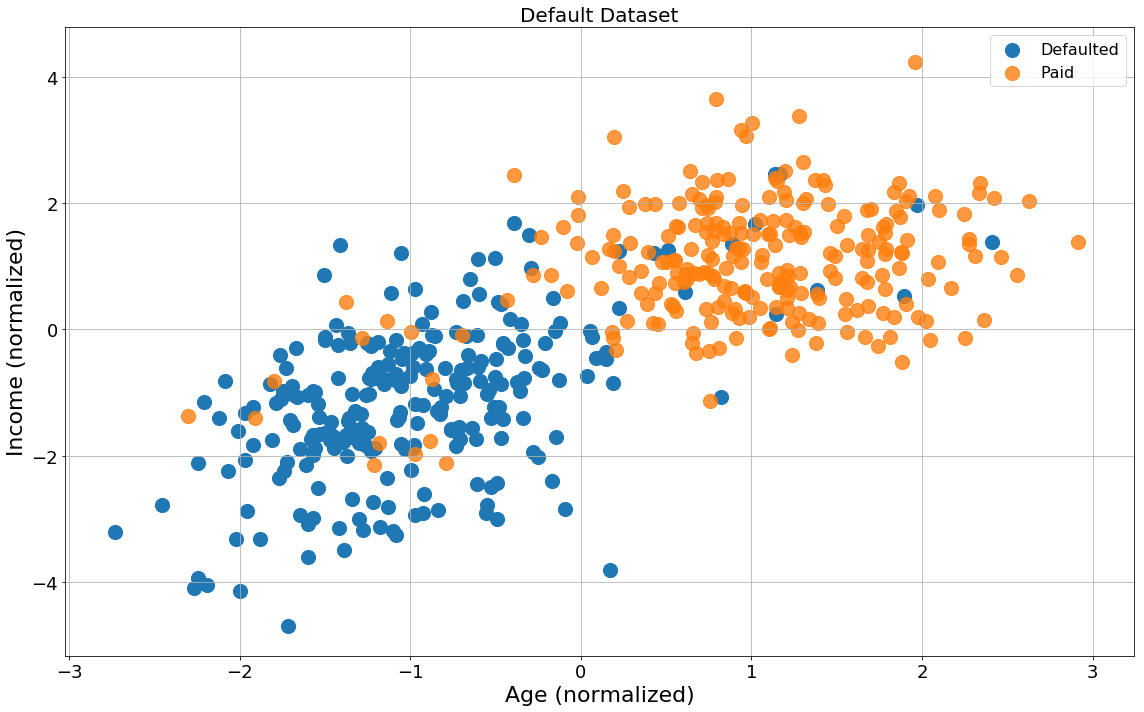

In [20]:
plt.figure(figsize=(16, 10));
plt.grid(True);

ind_d = y==1
ind_p = y==0
plt.scatter(X[ind_d,0], X[ind_d,1], marker='o', s=200, label='Defaulted');
plt.scatter(X[ind_p,0], X[ind_p,1], marker='o', s=200, label="Paid", alpha=0.8);

plt.legend(fontsize=16);
plt.title("Default Dataset", fontsize=20);
plt.xlabel('Age (normalized)', fontsize=22);
plt.ylabel('Income (normalized)', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
#plt.savefig('out/default-data.png');

In [21]:
X.shape
X[1:10,:]
y.shape
y[1:10]
df.head(15)

(500, 2)

array([[-1.64575979, -2.9333321 ],
       [ 0.27982946,  0.83540131],
       [ 0.19585293,  1.24920912],
       [-1.35705338, -1.4091226 ],
       [-0.49425018, -3.00562239],
       [-1.37872953,  0.4408266 ],
       [ 1.14567439,  0.24986299],
       [ 0.96821192,  0.57301515],
       [ 1.56205843, -0.04601173]])

(500,)

array([1, 0, 0, 1, 1, 0, 1, 0, 0])

,Age,Income,Default
0,0.748126,1.185890,0
1,-1.645760,-2.933332,1
2,0.279829,0.835401,0
3,0.195853,1.249209,0
4,-1.357053,-1.409123,1
5,-0.494250,-3.005622,1
6,-1.378730,0.440827,0
7,1.145674,0.249863,1
8,0.968212,0.573015,0
9,1.562058,-0.046012,0


In [22]:
df = pd.read_csv('data/GermanCredit.csv')

In [23]:
df.shape
df.head()

(1000, 62)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


# Feature Engineering

## Feature Scaling

In [24]:
from sklearn import preprocessing

X = df[['Amount']].copy()

scaler = preprocessing.StandardScaler().fit(X[['Amount']])
X['Amount_Scaled'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.MinMaxScaler().fit(X[['Amount']])
X['Amount_MinMax'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X[['Amount']])
X['Amount_BoxCox'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['Amount']])
X['Amount_YeoJohnson'] = scaler.transform(X[['Amount']])  

scaler = preprocessing.QuantileTransformer(random_state=0).fit(X[['Amount']])
X['Amount_Uniform'] = scaler.transform(X[['Amount']])  

type(X)
X.head()


C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


pandas.core.frame.DataFrame

,Amount,Amount_Scaled,Amount_MinMax,Amount_BoxCox,Amount_YeoJohnson,Amount_Uniform
0,1169,-0.745131,0.050567,-0.932601,-0.932701,0.154655
1,5951,0.949817,0.313690,1.156740,1.156805,0.846847
2,2096,-0.416562,0.101574,-0.157834,-0.157831,0.448448
3,7882,1.634247,0.419941,1.496003,1.496009,0.927928
4,4870,0.566664,0.254209,0.910973,0.911056,0.810811


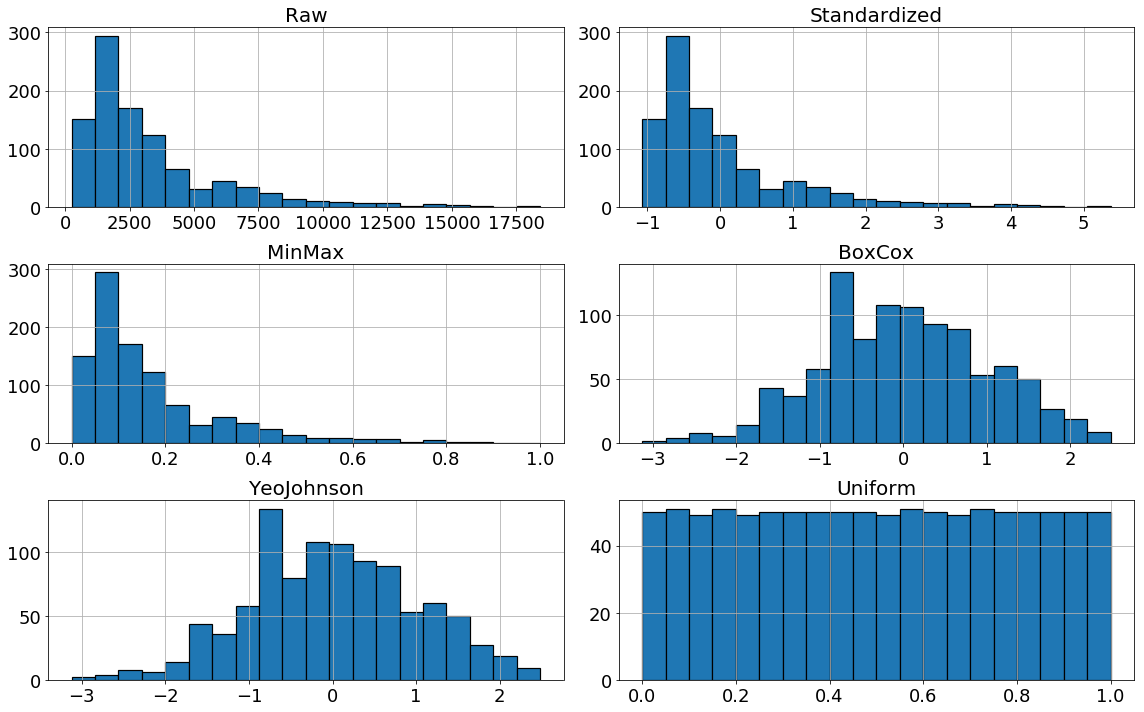

In [25]:
def plot_hist(ax, feature, title):
    ax.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    ax.set_title(title, fontsize=20);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);

plt.figure(figsize=(16, 10));
plt.grid(True);
plot_hist(plt.subplot(3, 2, 1), X['Amount'], 'Raw')
plot_hist(plt.subplot(3, 2, 2), X['Amount_Scaled'], 'Standardized')
plot_hist(plt.subplot(3, 2, 3), X['Amount_MinMax'], 'MinMax')
plot_hist(plt.subplot(3, 2, 4), X['Amount_BoxCox'], 'BoxCox')
plot_hist(plt.subplot(3, 2, 5), X['Amount_YeoJohnson'], 'YeoJohnson')
plot_hist(plt.subplot(3, 2, 6), X['Amount_Uniform'], 'Uniform')


#plt.title('Amount', fontsize=20)
plt.tight_layout();
plt.savefig('out/german_credit-transforms.png');

In [26]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(800, 61)

(200, 61)

# Feature Selection

In [27]:
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier

# Helper function
def evaluate_with_dt(X_train, X_test, y_train, y_test):
    clf_full = DecisionTreeClassifier(random_state=0)
    clf_full.fit(X_train, y_train)
    y_pred_dt = clf_full.predict(X_test)
    print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
    print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
    print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
    print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_dt)))

In [28]:
evaluate_with_dt(X_train, X_test, y_train['Class'], y_test['Class'])

Accuracy = 0.68
Kappa = 0.25
F1 Score = 0.77
Log Loss = 11.05


## Variance Threshold (Filter Method, Unsupervised)

In [29]:
X_train.shape

(800, 61)

In [30]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel.fit(X_train);

In [31]:
sel.variances_
sel.get_support()
sum(sel.get_support())

array([1.39235975e+02, 8.38891826e+06, 1.25877500e+00, 1.22011094e+00,
       1.30061548e+02, 3.34623437e-01, 1.23085937e-01, 2.43600000e-01,
       3.37750000e-02, 1.95943750e-01, 1.95943750e-01, 5.74984375e-02,
       2.40735937e-01, 4.18359375e-02, 4.52437500e-02, 2.49375000e-01,
       8.29234375e-02, 2.06943750e-01, 1.81093750e-01, 9.39750000e-02,
       1.41923437e-01, 2.02693750e-01, 1.35609375e-02, 2.31859375e-02,
       4.41109375e-02, 0.00000000e+00, 8.67343750e-03, 8.89984375e-02,
       1.23437500e-02, 2.41443750e-01, 9.19937500e-02, 6.51000000e-02,
       4.63734375e-02, 1.51560938e-01, 1.39443750e-01, 2.23593750e-01,
       1.44375000e-01, 1.88743750e-01, 6.29437500e-02, 4.06937500e-02,
       2.16693750e-01, 2.47500000e-01, 8.19000000e-02, 0.00000000e+00,
       9.00000000e-02, 4.06937500e-02, 5.41937500e-02, 1.99375000e-01,
       1.79775000e-01, 2.23185937e-01, 1.30110937e-01, 1.17685938e-01,
       4.18359375e-02, 1.47600000e-01, 1.44375000e-01, 2.03235937e-01,
      

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True])

35

In [32]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])

Accuracy = 0.72
Kappa = 0.35
F1 Score = 0.80
Log Loss = 9.50


## Univariate Feature Selection (Filter Method, Supervised)

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function chi2 at 0x0000017ACB9A9620>)

In [34]:
sel.pvalues_
sel.get_support()

array([1.06823246e-48, 0.00000000e+00, 4.09363596e-01, 8.53102259e-01,
       5.61882097e-14, 6.44590179e-01, 9.63002992e-01, 5.97370086e-01,
       6.69852691e-01, 1.54978247e-09, 5.75839949e-03, 1.38203850e-01,
       4.52646515e-11, 4.45131086e-06, 1.90630991e-04, 3.67405390e-01,
       9.98219008e-01, 7.21676188e-06, 8.03585798e-03, 2.69078763e-02,
       8.92054990e-01, 2.23837345e-03, 6.52000750e-01, 8.90134400e-01,
       1.40549331e-02,            nan, 3.61033126e-01, 3.02894981e-01,
       1.70724193e-01, 2.01603259e-02, 3.00953646e-01, 4.53967611e-02,
       1.85022557e-02, 1.31559791e-02, 2.85051843e-02, 6.27098026e-01,
       3.40446647e-01, 2.27435459e-02, 1.60413012e-01, 3.02659985e-01,
       3.42272027e-02, 6.82146244e-02, 8.59320947e-01,            nan,
       8.64553871e-01, 5.11213923e-01, 2.15101186e-01, 1.06310578e-03,
       9.53731444e-01, 5.09482599e-01, 8.67207881e-04, 5.99308430e-03,
       3.65503443e-01, 1.83767520e-01, 6.31610930e-03, 1.53712588e-02,
      

array([ True,  True, False, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [35]:
X_train_new = X_train.loc[:, sel.get_support()]
X_test_new = X_test.loc[:, sel.get_support()]

evaluate_with_dt(X_train_new, X_test_new, y_train['Class'], y_test['Class'])

Accuracy = 0.74
Kappa = 0.37
F1 Score = 0.82
Log Loss = 8.81


## Recursive Feature Elimination (Wrapper Method)

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier

clf = DecisionTreeClassifier(random_state=0)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X_train, y_train)

C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 4.09 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [37]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X_train.columns[rfecv.get_support()]

Optimal number of features : 49


array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39,
       40, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59],
      dtype=int64)

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
       'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none',
       'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid',
       'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Business',
       'Purpose.Other', 'SavingsAccountBonds.lt.100',
       'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7',
       'EmploymentDuration.Unemployed', 'Personal.Male.Divorced.Seperated',
       'Personal.Female.NotSi

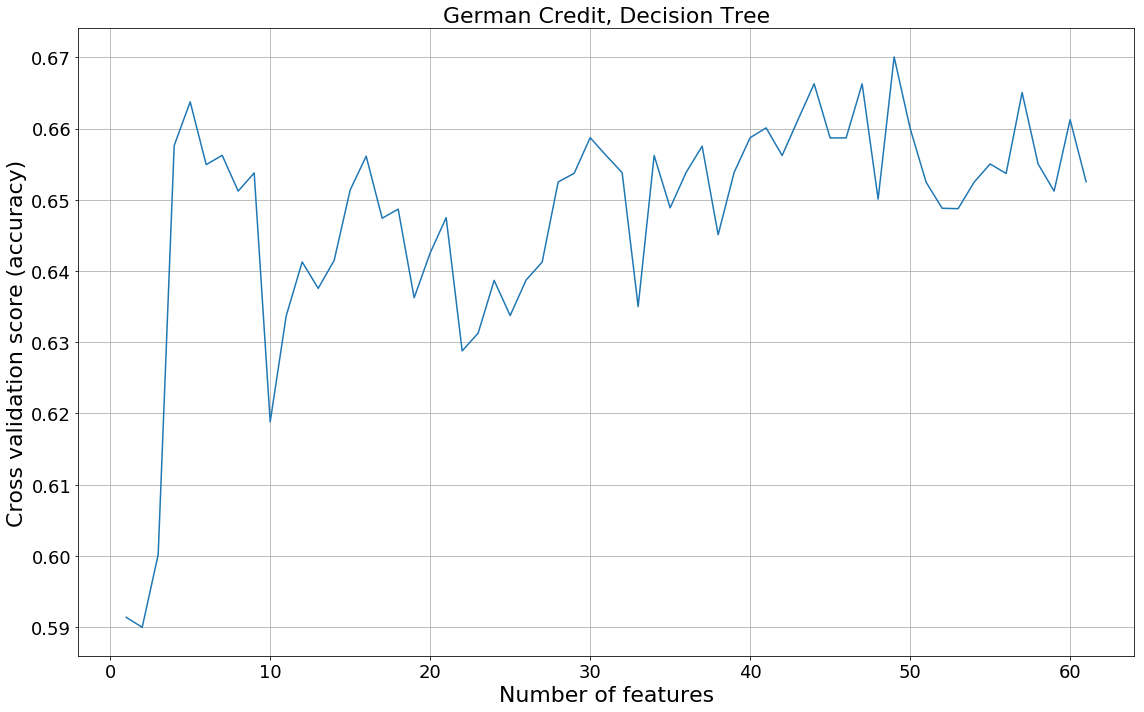

In [38]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16, 10));
plt.grid(True);
plt.title('German Credit, Decision Tree', fontsize=22);
plt.xlabel("Number of features", fontsize=22);
plt.ylabel("Cross validation score (accuracy)", fontsize=22);
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.tight_layout();
plt.savefig('out/german_credit-rfe.png');

# Hyperparameter Tuning

In [39]:
def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_fit_time'] = cv_results['mean_fit_time']
    results['mean_score_time'] = cv_results['mean_score_time']
    results['mean_train_score'] = cv_results['mean_train_score']
    results['std_train_score'] = cv_results['std_train_score']
    results['mean_test_score'] = cv_results['mean_test_score']
    results['std_test_score'] = cv_results['std_test_score']
    results['rank_test_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_test_score'], ascending=False)
    return results

In [40]:
from sklearn.model_selection import GridSearchCV

hyperparams = {'criterion':('gini', 'entropy'), 
               'max_depth':[1, 5, 10, 50],
               'max_leaf_nodes': [5, 20, 100]}
clf = DecisionTreeClassifier(min_samples_split=2)
gridsearch = GridSearchCV(clf, hyperparams, cv=5, return_train_score=True)
%time gridsearch.fit(X_train, y_train)

Wall time: 686 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 5, 10, 50], 'max_leaf_nodes': [5, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
results = cv_results_to_df(gridsearch.cv_results_)
results

,criterion,max_depth,max_leaf_nodes,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
7,gini,10,20,0.003598,0.000795,0.811881,0.011447,0.69500,0.012180,1
10,gini,50,20,0.003799,0.000801,0.813444,0.009436,0.69250,0.009265,2
19,entropy,10,20,0.004298,0.000601,0.793449,0.013994,0.68875,0.037051,3
4,gini,5,20,0.003399,0.000803,0.804069,0.008504,0.68625,0.020374,4
0,gini,1,5,0.005650,0.001509,0.719691,0.012373,0.68500,0.024491,5
2,gini,1,100,0.002604,0.000993,0.719691,0.012373,0.68500,0.024491,5
3,gini,5,5,0.003001,0.000601,0.735325,0.019560,0.68500,0.024491,5
6,gini,10,5,0.003195,0.000898,0.735325,0.019560,0.68500,0.024491,5
9,gini,50,5,0.002999,0.000701,0.735325,0.019560,0.68500,0.024491,5
1,gini,1,20,0.003617,0.000896,0.719691,0.012373,0.68500,0.024491,5


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

hyperparam_dist = {"max_depth": sp_randint(1, 50),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"]}

clf = DecisionTreeClassifier(min_samples_split=2)
randomsearch = RandomizedSearchCV(clf, param_distributions=hyperparam_dist, 
                                  cv=5, return_train_score=True, n_iter=100, iid='warn');
%time randomsearch.fit(X_train, y_train);

Wall time: 2.53 s


C:\Users\st50\AppData\Local\Continuum\anaconda3\envs\small_sklearn\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ACBEF86D8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ACBEF81D0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ACBEF8518>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [43]:
cv_results_to_df(randomsearch.cv_results_)

,criterion,max_depth,max_features,min_samples_split,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
82,entropy,4,10,8,0.003201,0.000998,0.750003,0.004799,0.71250,0.040982,1
75,entropy,8,3,3,0.008100,0.001700,0.767177,0.017667,0.70875,0.031025,2
54,entropy,3,5,6,0.002599,0.000700,0.712501,0.008530,0.70250,0.013947,3
94,entropy,2,6,4,0.002000,0.000701,0.709696,0.013039,0.70125,0.008904,4
86,entropy,3,5,2,0.002100,0.000700,0.714068,0.012016,0.70125,0.008904,4
68,entropy,2,7,8,0.003703,0.001197,0.708434,0.008863,0.70000,0.032705,6
98,entropy,1,9,9,0.001998,0.000602,0.700313,0.002996,0.70000,0.003511,6
92,entropy,5,6,10,0.002101,0.000700,0.748742,0.007798,0.70000,0.021856,6
50,entropy,1,1,6,0.002895,0.001000,0.698750,0.000431,0.69875,0.001717,9
62,entropy,1,2,3,0.002700,0.000800,0.698750,0.000431,0.69875,0.001717,9


# Class Imbalance

In [44]:
# See package: https://github.com/scikit-learn-contrib/imbalanced-learn